# Data Analysis
i) Which are the numerical and which are the categorical?

ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question
from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc.

Write concise answers to each question and support your findings with evidence (statistics, plots,
etc.). Discuss the results. Additionally, you can explore the correlation of features, outliers, range of
values, and many more aspects.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('training_data.csv')
data

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [ ]:
categorical = data[['hour_of_day','day_of_week','month','holiday','weekday','summertime','snow','increase_stock']]
# Snow is a very bad variable it's only either 0 or nan
numerical = data[['temp','dew','humidity','precip','snowdepth','windspeed','cloudcover','visibility']]

In [ ]:
# Naive classifier and proportion of data
total = len(data)
increase = len(data[data["increase_stock"]=='high_bike_demand'])
decrease = len(data[data["increase_stock"]=='low_bike_demand'])
proportion_increase = increase/total #18%
proportion_decrease = decrease/total #82%
# Hence a naive classifier that always predicts decrease achieve 82% missclassification

In [ ]:
# Different hours
hours = sorted(data['hour_of_day'].unique())
hours_high_demand = []
hours_low_demand = []
for hour in hours:
  hours_high_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'high_bike_demand'")))
  hours_low_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'low_bike_demand'")))

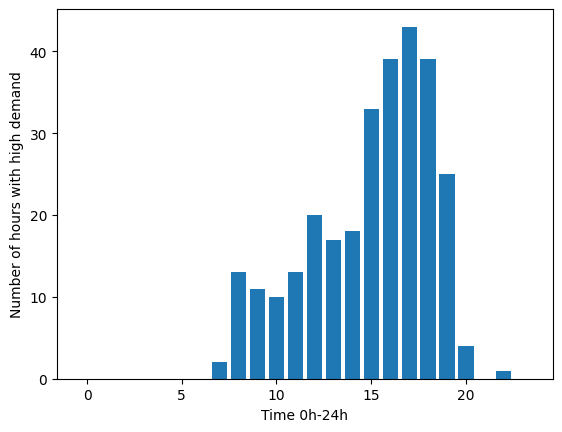

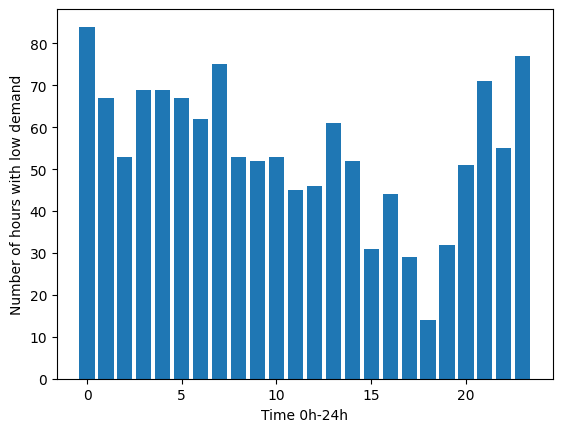

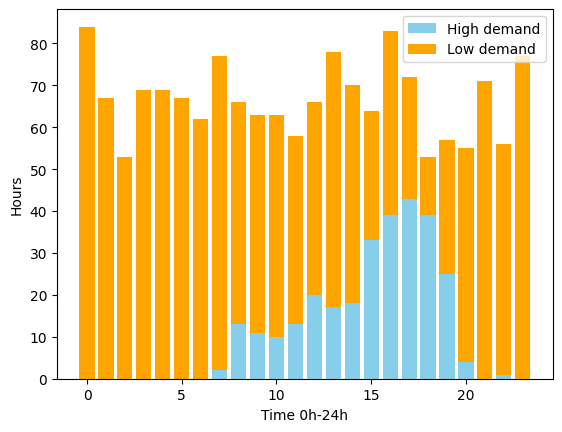

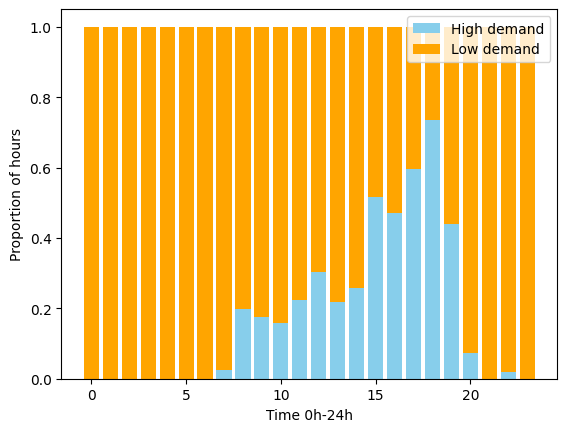

In [ ]:
plt.figure()
plt.bar(hours,hours_high_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with high demand')
plt.figure()
plt.bar(hours,hours_low_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with low demand')
plt.figure()
plt.bar(hours,hours_high_demand,color='skyblue',label='High demand')
plt.bar(hours,hours_low_demand,bottom=hours_high_demand,color='orange',label='Low demand')
plt.xlabel('Time 0h-24h')
plt.ylabel('Hours')
plt.legend()
plt.figure()
total_hours = np.add(hours_high_demand,hours_low_demand)
plt.bar(hours,hours_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(hours,hours_low_demand/total_hours,bottom=hours_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Time 0h-24h')
plt.ylabel('Proportion of hours')
plt.legend()

In [ ]:
# Different weeks
dws = sorted(data['day_of_week'].unique())
dw_high_demand = []
dw_low_demand = []
for dw in dws:
  dw_high_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'high_bike_demand'")))
  dw_low_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'low_bike_demand'")))

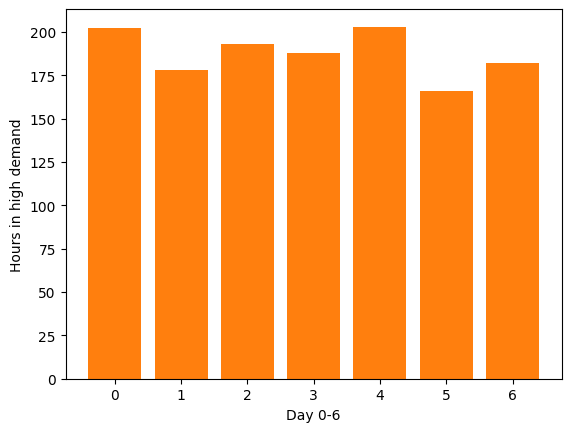

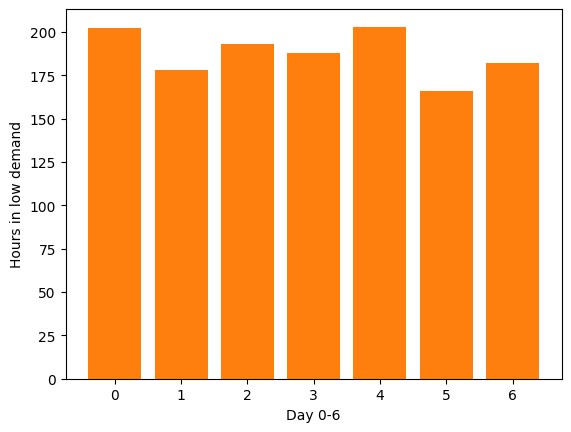

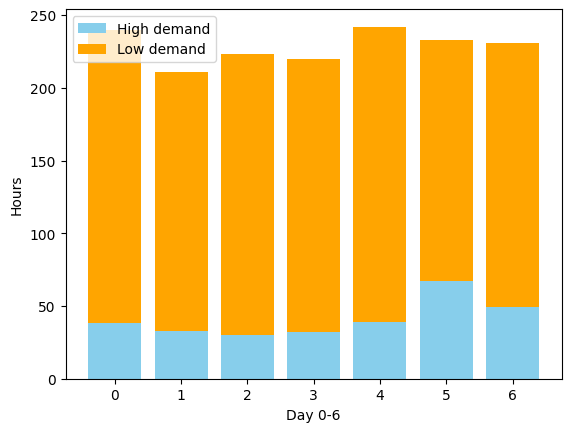

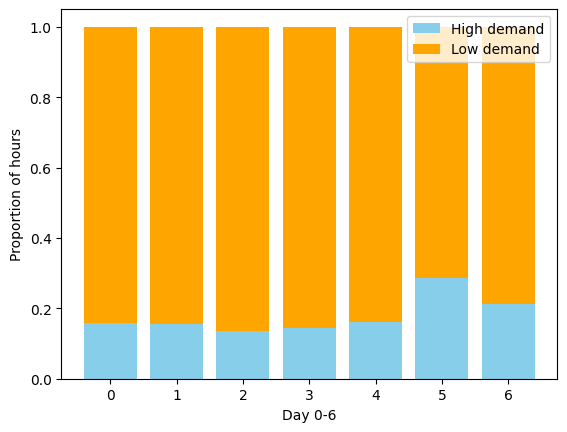

In [ ]:
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-6')
plt.ylabel('Hours in high demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-6')
plt.ylabel('Hours in low demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand,color='skyblue',label='High demand')
plt.bar(dws,dw_low_demand,bottom=dw_high_demand,color='orange',label='Low demand')
plt.xlabel('Day 0-6')
plt.ylabel('Hours')
plt.legend()
plt.figure()
total_hours = np.add(dw_high_demand,dw_low_demand)
plt.bar(dws,dw_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(dws,dw_low_demand/total_hours,bottom=dw_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Day 0-6')
plt.ylabel('Proportion of hours')
plt.legend()


In [ ]:
# Different months
months = sorted(data['month'].unique())
month_high_demand = []
month_low_demand = []
for month in months:
  month_high_demand.append(len(data.query("month == @month and increase_stock == 'high_bike_demand'")))
  month_low_demand.append(len(data.query("month == @month and increase_stock == 'low_bike_demand'")))

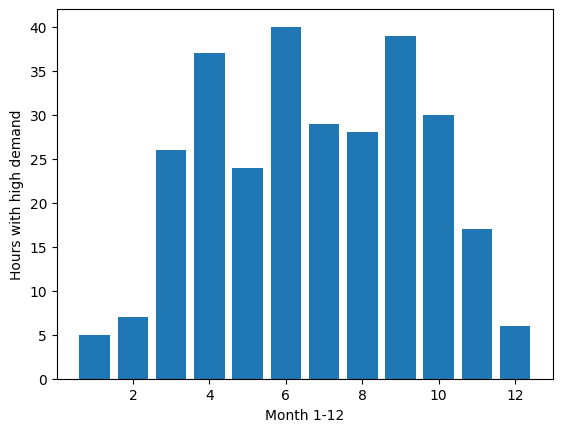

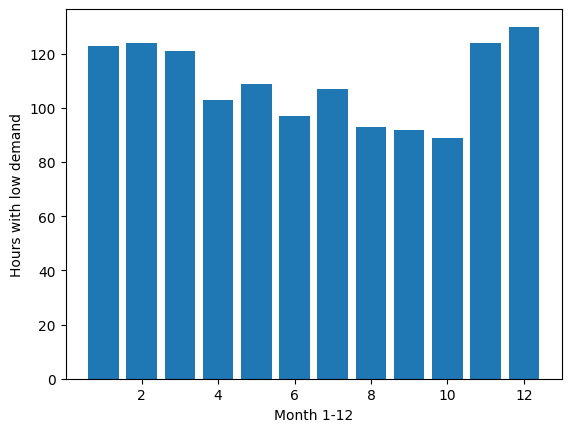

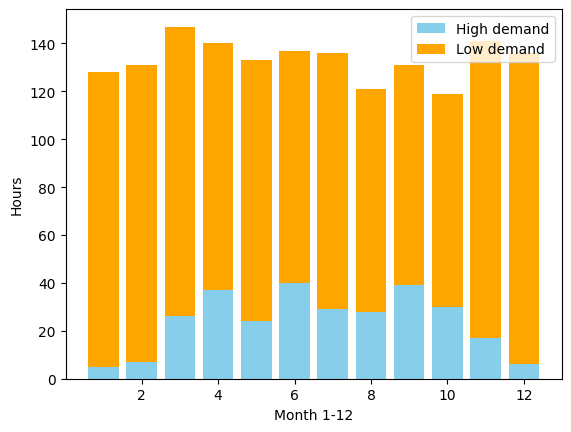

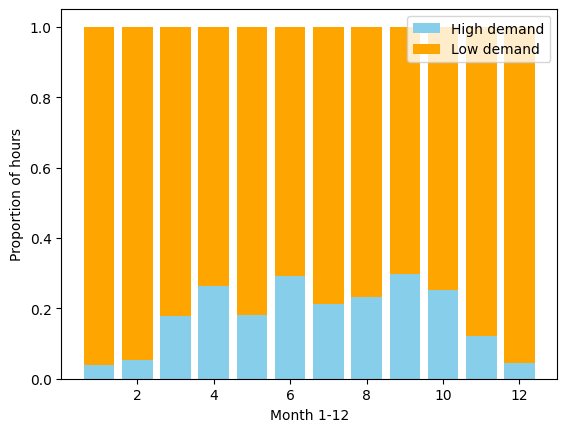

In [ ]:
plt.figure()
plt.bar(months,month_high_demand)
plt.xlabel('Month 1-12')
plt.ylabel('Hours with high demand')
plt.figure()
plt.bar(months,month_low_demand)
plt.xlabel('Month 1-12')
plt.ylabel('Hours with low demand')
plt.figure()
plt.bar(months,month_high_demand,color='skyblue',label='High demand')
plt.bar(months,month_low_demand,bottom=month_high_demand,color='orange',label='Low demand')
plt.xlabel('Month 1-12')
plt.ylabel('Hours')
plt.legend()
plt.figure()
total_hours = np.add(month_high_demand,month_low_demand)
plt.bar(months,month_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(months,month_low_demand/total_hours,bottom=month_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Month 1-12')
plt.ylabel('Proportion of hours')
plt.legend()

In the next cell we test for the diferent correlations.

We remove three columns [dew, snow, weekday] because they are highly correlated with other columns.

We keep all the others for now, we may remove ones later.

<ipython-input-60-514b5c6dfbca>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


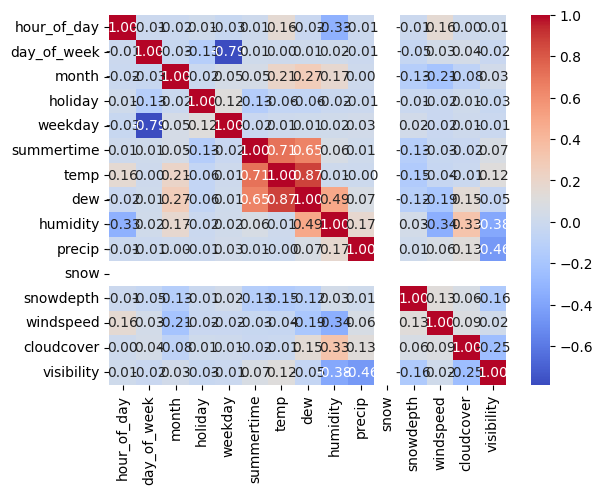

In [ ]:
import seaborn as sns
# Weekdays and holidays
# Weekdays correlated to days as weekdays are just 0-5, weekends are 0-2
correlation_matrix = data.corr()
# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<Axes: >

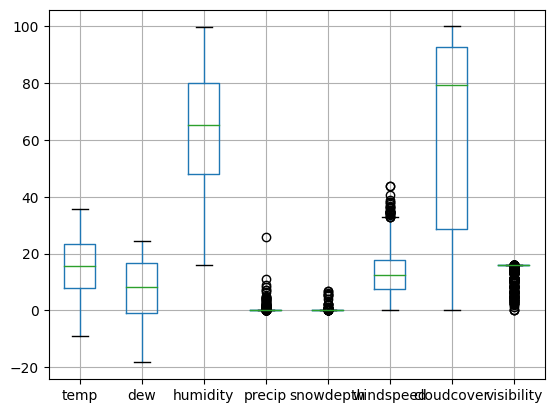

In [ ]:
# Do some bar plots of numerical values
numerical.boxplot()

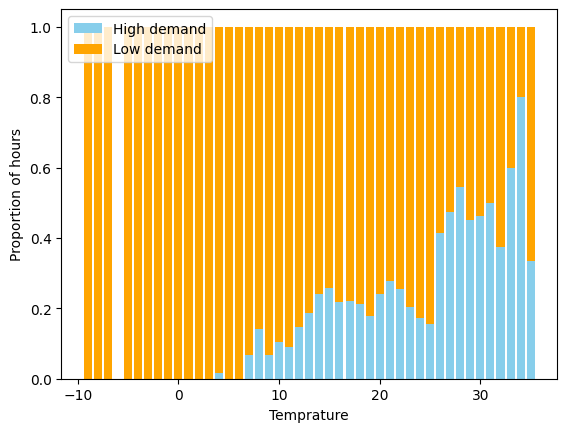

In [ ]:
# Temprature
data['itemp'] = data['temp'].astype(int)
temps = data['itemp']
temps_high_demand = []
temps_low_demand = []
for temp in temps:
  temps_high_demand.append(len(data.query("itemp == @temp and increase_stock == 'high_bike_demand'")))
  temps_low_demand.append(len(data.query("itemp == @temp and increase_stock == 'low_bike_demand'")))
plt.figure()
total_hours = np.add(temps_high_demand,temps_low_demand)
plt.bar(temps,temps_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(temps,temps_low_demand/total_hours,bottom=temps_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Temprature')
plt.ylabel('Proportion of hours')
plt.legend()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


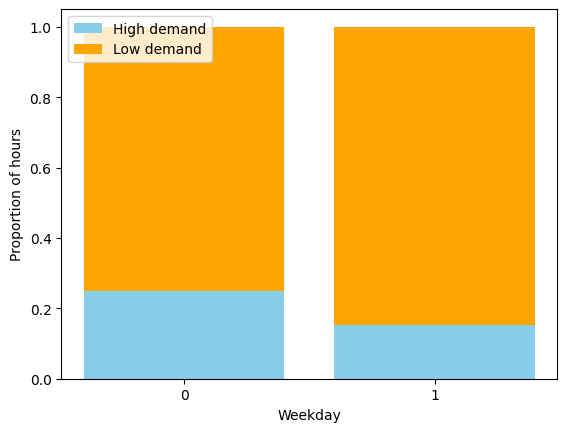

In [ ]:
#Weekdays
weekdays = data['weekday']
weekday_high_demand = []
weekday_low_demand = []
for weekday in weekdays:
  weekday_high_demand.append(len(data.query("weekday == @weekday and increase_stock == 'high_bike_demand'")))
  weekday_low_demand.append(len(data.query("weekday == @weekday and increase_stock == 'low_bike_demand'")))
plt.figure()
total_hours = np.add(weekday_high_demand,weekday_low_demand)
plt.bar(weekdays,weekday_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(weekdays,weekday_low_demand/total_hours,bottom=weekday_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Weekday')
plt.ylabel('Proportion of hours')
plt.xticks([0,1])
plt.legend()

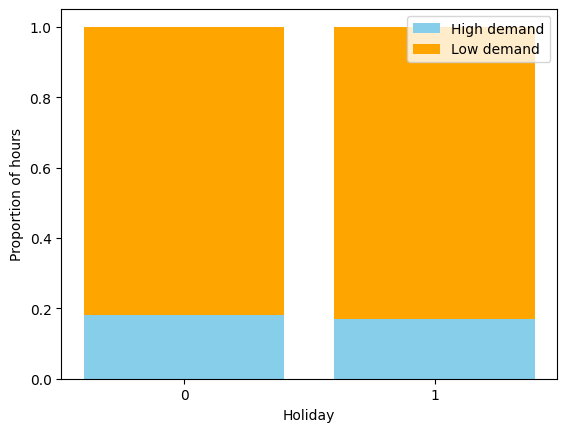

In [ ]:
#Holiday
holidays = data['holiday']
holiday_high_demand = []
holiday_low_demand = []
for holiday in holidays:
  holiday_high_demand.append(len(data.query("holiday == @holiday and increase_stock == 'high_bike_demand'")))
  holiday_low_demand.append(len(data.query("holiday == @holiday and increase_stock == 'low_bike_demand'")))
plt.figure()
total_hours = np.add(holiday_high_demand,holiday_low_demand)
plt.bar(holidays,holiday_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(holidays,holiday_low_demand/total_hours,bottom=holiday_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Holiday')
plt.ylabel('Proportion of hours')
plt.xticks([0,1])
plt.legend()

# Importing packages

In [ ]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import fbeta_score, make_scorer, recall_score, precision_score
from sklearn.preprocessing import normalize

# Train - valid - test split

In [ ]:
#just importing the feature manipulation here
filtered = data.drop(['precip', 'holiday', 'snowdepth', 'snow', 'dew'], axis=1)
data_set = filtered
data_set['rushhour'] = filtered['hour_of_day'].apply(lambda x: 1 if x > 2 and x < 8 else 0)
data_set['goodtemp'] = filtered['temp'].apply(lambda x: 1 if x>25 else 0)

X = normalize(data_set.drop('increase_stock',axis=1))
y = data_set['increase_stock']

In [ ]:
from sklearn.model_selection import train_test_split
X_in, X_test, y_in, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def print_metrics(model,X_test,y_test):
  y_preds = model.predict(X_test)
  y_test = np.array(y_test).reshape(-1)
  #Confusion Matrix
  cross_vals=pd.crosstab(y_preds, y_test)
  print(cross_vals)
  missclassification_rate = np.mean([y_preds != y_test])
  print(f"Missclassification {missclassification_rate}")
  accuracy = 1-missclassification_rate
  print(f"Accuracy {accuracy}")
  recall = recall_score(y_test, y_preds,pos_label='high_bike_demand')
  print(f"Recall {recall}")
  precision = precision_score(y_test, y_preds,pos_label='high_bike_demand')
  print(f"Precision {precision}")
  beta = 1.5
  F_beta = ((1+beta**2) *precision * recall) / (beta**2 * precision + recall)
  print(f"F_beta {F_beta}")

# Logistic Regression

In [ ]:
model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': [None,'l1','l2'],
    'max_iter': [10, 50 ,100, 500, 1000,5000],
    'solver': ['liblinear']
}
fb_score = make_scorer(fbeta_score, beta=1.5, pos_label='high_bike_demand')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=fb_score)
grid_search.fit(X_in, y_in)
best_model = grid_search.best_estimator_
#print_metrics(best_model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

In [ ]:
grid_search.best_params_

{'C': 100, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
model = LogisticRegression(solver='liblinear',C=1000,max_iter=50,penalty='l1')
model.fit(X_in, y_in)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                20               19
low_bike_demand                 30              251
Missclassification 0.153125
Accuracy 0.846875
Recall 0.4
Precision 0.5128205128205128
F_beta 0.4290429042904291


# Discriminate Analysis

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_in, y_in, test_size=0.20, random_state=1337)

In [ ]:
model1 = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.005)
model2 = skl_da.QuadraticDiscriminantAnalysis(reg_param=0)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
print_metrics(model1, X_valid, y_valid)
print_metrics(model2, X_valid, y_valid)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                17                6
low_bike_demand                 36              197
Missclassification 0.1640625
Accuracy 0.8359375
Recall 0.32075471698113206
Precision 0.7391304347826086
F_beta 0.38840070298769774
col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                43               38
low_bike_demand                 10              165
Missclassification 0.1875
Accuracy 0.8125
Recall 0.8113207547169812
Precision 0.5308641975308642
F_beta 0.6978776529338329


In [ ]:
model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0)
model.fit(X_in, y_in)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                37               63
low_bike_demand                 13              207
Missclassification 0.2375
Accuracy 0.7625
Recall 0.74
Precision 0.37
F_beta 0.5658823529411764


# K nearest neighbours

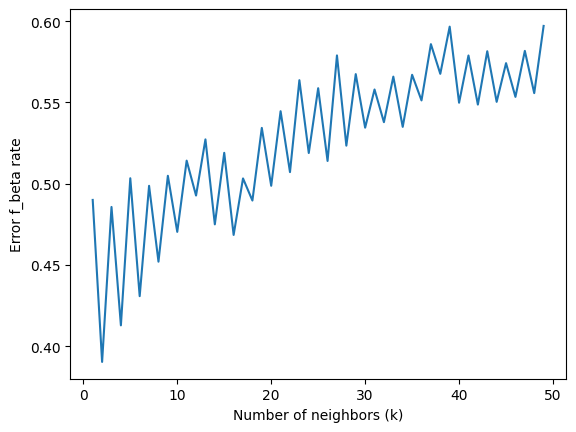

minimum is: 0.39041781267595355 at k=2


In [ ]:
#elbow method for figuring out optimal number of k neighbours
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

def metric_f_beta(y_test,y_preds):
  y_test = np.array(y_test).reshape(-1)
  recall = recall_score(y_test, y_preds,pos_label='high_bike_demand')
  precision = precision_score(y_test, y_preds,pos_label='high_bike_demand')
  beta = 1.5
  F_beta = ((1+beta*2) *precision * recall) / (beta*2 * precision + recall)
  return F_beta
n = [x for x in range(1,50)]
error_rates = []

kf = KFold(n_splits=5, random_state=42, shuffle=True)
y_in = np.array(y_in)
for j, (train_index, test_index) in enumerate(kf.split(X_in)):
  error_rate_i = []
  for i in n :
    model = skl_nb.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_in[train_index], y_in[train_index])
    y_pred = model.predict(X_in[test_index])
    error_rate = 1-metric_f_beta(y_in[test_index], y_pred)
    error_rate_i.append(error_rate)
  error_rates.append(error_rate_i)

avg_errors = np.mean(np.array(error_rates), axis=0)

plt.plot(n, avg_errors)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Error f_beta rate')
plt.show()
print(f'minimum is: {np.min(avg_errors)} at k={np.argmin(avg_errors)+1}')

In [ ]:
n = 2
model = skl_nb.KNeighborsClassifier(n_neighbors=n)
model.fit(X_in, y_in)
print_metrics(model, X_test, y_test)

ValueError: ignored

In [ ]:
n = 2
model = skl_nb.KNeighborsClassifier(n_neighbors=n)
model.fit(X_in, y_in)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                30               63
low_bike_demand                 20              207
Missclassification 0.259375
Accuracy 0.740625
Recall 0.6
Precision 0.3225806451612903
F_beta 0.4744525547445256


# Tree based methods

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8 ,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
fb_score = make_scorer(fbeta_score, beta=1.5,pos_label='high_bike_demand')
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=fb_score)
rf_random.fit(X_in, y_in)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 25, 50, 75, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 15],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [1, 112, 223, 334, 445,
                                                         556, 667, 778, 889,
                                                         1000]},
                   random_state=42,
                   scoring=make_scorer(fbeta_score, beta=1.5, pos_label=high_bike_demand),
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 334,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
model = RandomForestClassifier(n_estimators=334, max_depth=50, min_samples_leaf=1, min_samples_split=5, bootstrap=False, max_features='auto')
model.fit(X_in, y_in)
print_metrics(model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                26               24
low_bike_demand                 24              246
Missclassification 0.15
Accuracy 0.85
Recall 0.52
Precision 0.52
F_beta 0.52


In [ ]:
final_test = pd.read_csv('test_data.csv')
final_test = final_test.drop(['precip', 'holiday', 'snowdepth', 'snow', 'dew'], axis=1)
final_test['rushhour'] = final_test['hour_of_day'].apply(lambda x: 1 if x > 2 and x < 8 else 0)
final_test['goodtemp'] = final_test['temp'].apply(lambda x: 1 if x>25 else 0)
final_test = normalize(final_test)

In [ ]:
# Run final test using random forest as it had highest accuracy
# and we assume this will be the metric used to measure performance
model = RandomForestClassifier(n_estimators=334, max_depth=50, min_samples_leaf=1, min_samples_split=5, bootstrap=False, max_features='auto')
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=50, max_features='auto',
                       min_samples_split=5, n_estimators=334)

In [ ]:
preds = model.predict(final_test)
preds

array(['low_bike_demand', 'high_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'high_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'high_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'high_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'high_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike_demand', 'low_bike_demand',
       'low_bike_demand', 'low_bike

In [ ]:
import csv
out_preds = [0 if pred == 'low_bike_demand' else 1 for pred in preds]
with open(r'out.csv', 'w') as fp:
    for pred in out_preds:
        fp.write("%s," % pred)

# Remove the last comma manually for submission